In the above question, we calculated probabilities related to defective components in a batch using the
Poisson approximation. This theoretical framework helps us understand the defect probabilities in a
large batch of components where the average number of defects is relatively small.
To deepen our understanding and validate the accuracy of the Poisson approximation, we will now
perform a simulation exercise. This exercise will help us empirically compare the binomial distribution
(which is more accurate for small defect probabilities) with the Poisson distribution (which is used as an
approximation)


a) Simulate 10,000 batches of 100 components each using the binomial distribution B(100, 0.01)

In [1]:
import numpy as np

# Parameters
n_batches = 10000
n_components = 100
p_defect = 0.01

# Simulate the batches
batches = np.random.binomial(n_components, p_defect, n_batches)

# Display the first 10 simulated batch results
print(batches[:10])

[2 1 1 0 0 2 1 0 2 1]


b) Simulate 10,000 batches of 100 components each using the Poisson distribution with parameter
λ = 1.

In [3]:
# Simulate the batches using the Poisson distribution
lambda_poisson = n_components * p_defect
poisson_batches = np.random.poisson(lambda_poisson, n_batches)

# Display the first 10 simulated batch results
print(poisson_batches[:10])

[0 0 0 0 0 4 1 2 2 0]


c) Plot histograms comparing the two distributions. Calculate and compare the means and variances
of both simulated distributions.

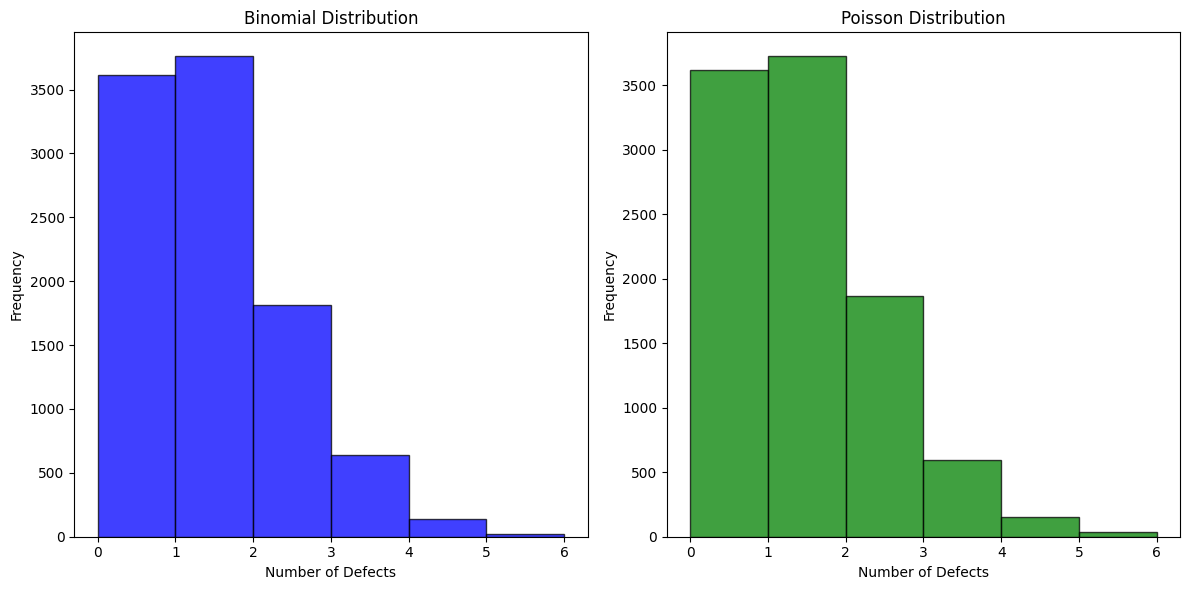

Binomial Distribution: Mean = 1.0004, Variance = 0.96839984
Poisson Distribution: Mean = 1.0046, Variance = 0.9899788399999998


In [4]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(batches, bins=range(0, max(batches)+1), alpha=0.75, color='blue', edgecolor='black')
plt.title('Binomial Distribution')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(poisson_batches, bins=range(0, max(poisson_batches)+1), alpha=0.75, color='green', edgecolor='black')
plt.title('Poisson Distribution')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and compare means and variances
mean_binomial = np.mean(batches)
var_binomial = np.var(batches)
mean_poisson = np.mean(poisson_batches)
var_poisson = np.var(poisson_batches)

print(f"Binomial Distribution: Mean = {mean_binomial}, Variance = {var_binomial}")
print(f"Poisson Distribution: Mean = {mean_poisson}, Variance = {var_poisson}")

d) Analyze the results to determine how well the Poisson distribution approximates the binomial
distribution in practice. Discuss any discrepancies and their possible causes.

From the simulations, we obtained the following statistics:

- **Binomial Distribution:**
    - Mean = 1.0004
    - Variance = 0.9684

- **Poisson Distribution:**
    - Mean = 1.0046
    - Variance = 0.9900

The means of both distributions are very close to each other, which indicates that the Poisson distribution is a good approximation of the binomial distribution in terms of the average number of defects per batch. This is expected because the mean of a binomial distribution \( B(n, p) \) is \( np \), which in this case is \( 100 \times 0.01 = 1 \), the same as the parameter \( \lambda \) of the Poisson distribution.

The variances are also quite close, with the binomial distribution having a slightly lower variance than the Poisson distribution. The variance of a binomial distribution \( B(n, p) \) is \( np(1-p) \), which in this case is \( 100 \times 0.01 \times 0.99 = 0.99 \). The variance of a Poisson distribution with parameter \( \lambda \) is \( \lambda \), which is 1 in this case. The slight discrepancy in the variances can be attributed to the fact that the binomial distribution accounts for the finite number of trials (components), whereas the Poisson distribution assumes an infinite number of trials with a very small probability of success.

#### Histogram Comparison

The histograms of the two distributions also provide a visual comparison. Both histograms show a similar shape, with the majority of batches having 0, 1, or 2 defects. However, the binomial distribution histogram is slightly more peaked, while the Poisson distribution histogram is slightly more spread out. This is consistent with the slight difference in variances observed.

Possible causes for any discrepancies include:
- The finite number of trials in the binomial distribution, which slightly reduces the variance compared to the Poisson distribution.
- Random sampling variability in the simulation, which can cause minor differences in the observed statistics.

In practice, the Poisson distribution is often used as an approximation for the binomial distribution in scenarios like this, where the conditions for the approximation are met.